Firstly, we are importing numpy and tensorflow for the implementation purpose.

In [0]:
import numpy as np

Next, We are downloading the datasets from the github and storing the data in the Colab's internal storage by making a folder named 'data'. 

In [0]:
!mkdir data
#https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/sentiment-rnn/data/labels.txt
!wget -c https://github.com/mchablani/deep-learning/raw/master/sentiment-network/reviews.txt
!wget -c https://github.com/mchablani/deep-learning/raw/master/sentiment-network/labels.txt
!mv *.txt data/

mkdir: cannot create directory ‘data’: File exists
--2019-06-08 10:32:21--  https://github.com/mchablani/deep-learning/raw/master/sentiment-network/reviews.txt
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mchablani/deep-learning/master/sentiment-network/reviews.txt [following]
--2019-06-08 10:32:21--  https://raw.githubusercontent.com/mchablani/deep-learning/master/sentiment-network/reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33678267 (32M) [text/plain]
Saving to: ‘reviews.txt’

reviews.txt         100%[===================>]  32.12M  --.-KB/s    in 0.1s    

2019-06-08 10:32:22

We are here opening the text data, which are two files, one is called 'reviews', which contains the raw data of meaning reviews of movies, which includes blank space, very very long sized reviews, even some very short ones. Another one is labels, which indicates, if the review is positive or negative. The reviews and labels are length of 25001.

In [0]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

# open text file and read in data as `text`
with open('data/reviews.txt', 'r') as f:
    reviews = f.read()
with open('data/labels.txt', 'r') as f:
    labels = f.read()
    
print(reviews[:2000])
print()
print(labels[:26])

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turn

Now we will to make our data, which is Movie Reviews, feedable into our Model. That is why we need to pre-process the data.

In [0]:
#reviews = reviews.split()
#print(reviews[:200])

We are going to do the first pre-processing step of our Movie Reviews data, which is to make any text in lower form, which are in the capital form. We will do it using `.lower()` function.

In [0]:
reviews = reviews.lower()

print(reviews[:200])

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  


Next pre-processing step is to remove any punctuations like `!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~`. For that, we are just importing punctuations function from string and removing it the later part using a for loop.

In [0]:
from string import punctuation
print(punctuation)

all_text = ''.join([c for c in reviews if c not in punctuation])
print(all_text[:200])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
bromwell high is a cartoon comedy  it ran at the same time as some other programs about school life  such as  teachers   my   years in the teaching profession lead me to believe that bromwell high  s 


Then we are spliting the reviews in a single single manner. Before this step, all the reviews were messed up in a single line form, which is very confusing for a computer to read. We are also printing the number of total reviews, which is 25,001 here.

In [0]:
reviews_split = all_text.split('\n')
print("Number of Reviews: ", len(reviews_split))

Number of Reviews:  25001


We are again doing it for the labels part.

In [0]:
labels_split = labels.split('\n')
print(labels_split)

Here, we are Tokenizing our input words. First, we are making our words separate from our sentences. Then counting the word sequence, means which word used how many time and arranges them according to the descending order. 
As you can see that word **'the'** used most times, **336713** times.
I am also printing the total number we can find here, which is 6020196.

In [0]:
from collections import Counter
counter_words = ''.join(reviews_split)

words = counter_words.split()

counter = Counter(words)
print(counter)

total_words = len(words)
print(total_words)
sorted_words = counter.most_common(total_words)

Here, we are creating a voacb to index mapping dictionary in such a way that your frequently occurring words are assigned lower indexes. 


 There is a little trick here, in this mapping index will start from 0 i.e. mapping of ‘the’ will be 0. But later on we are going to do padding for shorter reviews and conventional choice for padding is 0. So we need to start this indexing from 1.



In [0]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print(vocab_to_int)

In this stage we will encode the input reviews. We did make a list of single single reviews, made the index-mapping dictionary and now we will, make the proper word to integer encoding, i.e. replace words in our reviews by integers.

In [0]:
reviews_int = []
for review in reviews_split:
  r = [vocab_to_int[w] for w in review.split()]
  reviews_int.append(r)
print(reviews_int[0:3])

[[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23], [63, 4, 3, 125, 36, 47, 7472, 1395, 16, 3, 4181, 505, 45, 17, 3, 622, 134, 12, 6, 3, 1279, 457, 4, 1721, 207, 3, 10624, 7373, 300, 6, 667, 83, 35, 2116, 1086, 2989, 34, 1, 898, 46417, 4, 8, 13, 5096, 464, 8, 2656, 1721, 1, 221, 57, 17, 58, 794, 1297, 832, 228, 8, 43, 98, 123, 1469, 59, 147, 38, 1, 963, 142, 29, 667, 123, 1, 13584, 410, 61, 94, 177

We will do it for the labels too along with reviews.

In [0]:
encoded_labels = [1 if labels == "positive" else 0 for labels in labels_split]
encoded_labels = np.array(encoded_labels)

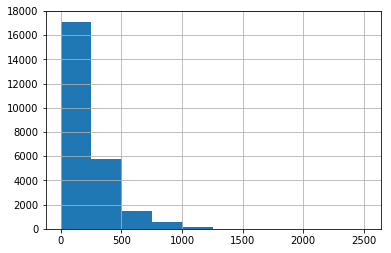

count    25001.000000
mean       240.798208
std        179.020628
min          0.000000
25%        130.000000
50%        179.000000
75%        293.000000
max       2514.000000
dtype: float64

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

We will remove outliers from the review sets. Outlier means reviews which is too short like 0 words or so.

In [0]:
reviews_int = [reviews_int[i] for i, l in enumerate(reviews_len) if l > 0]
encoded_labels = [encoded_labels[i] for i, l in enumerate(reviews_len) if l > 0]

We have to set a sequence length, in which the reviews are going to lie. Reviews, which are larger than sequence length, we will truncate them and reviews, which are less than sequence length, we will pad them using zeros.

In [0]:
def pad_features(reviews_int, sequence_length):
  
  features = np.zeros((len(reviews_int), sequence_length), dtype = int)
  
  for i, review in enumerate(reviews_int):
    
    reviews_len = len(review)
    
    if reviews_len <= sequence_length:
      zeroes = list(np.zeros(sequence_length - reviews_len))
      new = zeroes + review
      
    elif reviews_len > sequence_length:
      new = review[0:sequence_length]
      
    features[i, :] = np.array(new)
    
  return features

In [0]:
sequence_length = 100

features = pad_features(reviews_int, sequence_length = sequence_length)

#assert len(features)==len(reviews_int)
#assert len(features[0])==sequence_length

print (features[:10,:10])

[[21025   308     6     3  1050   207     8  2138    32     1]
 [   63     4     3   125    36    47  7472  1395    16     3]
 [22382    42 46418    15   706 17139  3389    47    77    35]
 [ 4505   505    15     3  3342   162  8312  1652     6  4819]
 [  520   119   113    34 16372  1816  3737   117   885 21030]
 [   11    20  3637   141    10   422    23   272    60  4355]
 [   11     6   692     1    90  2156    20 11728     1  2818]
 [  786   295    10   122    11     6   419     5    29    35]
 [   11     6    24     1   779  3687  2818    20     8    14]
 [   54    10    14   116    60   798   552    71   364     5]]


In [0]:
split_frac = 0.85

split_num = int(len(features) * split_frac)
train_x, remaining_x = features[0:split_num], features[split_num:]
train_y, remaining_y = encoded_labels[0:split_num], encoded_labels[split_num:]

remain = int(len(remaining_x) * 0.5)
valid_x, test_x = remaining_x[:remain], remaining_x[remain:]
valid_y, test_y = remaining_y[:remain], remaining_y[remain:]

print('shape of training set: {}' .format(train_x.shape))
print('shape of valid set: {}' .format(valid_x.shape))
print('shape of test set: {}' .format(test_x.shape))

shape of training set: (21250, 100)
shape of valid set: (1875, 100)
shape of test set: (1875, 100)


In [0]:
import torch
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(torch.from_numpy(np.array(train_x)), torch.from_numpy(np.array(train_y)))
valid_data = TensorDataset(torch.from_numpy(np.array(valid_x)), torch.from_numpy(np.array(valid_y)))
test_data = TensorDataset(torch.from_numpy(np.array(test_x)), torch.from_numpy(np.array(test_y)))

batch_size = 25

dataloader_train = DataLoader(train_data, shuffle = True, batch_size = batch_size)
dataloader_valid = DataLoader(valid_data, shuffle = True, batch_size = batch_size)
dataloader_test = DataLoader(test_data, shuffle = True, batch_size = batch_size)

In [0]:
dataiter = iter(dataloader_train)
sample_x, sample_y = dataiter.next()

print('the size of the input: {}' .format(sample_x.shape))
print()
print('The input sample {}' .format(sample_x))
print()
print('The Test Sample {}' .format(sample_y))

the size of the input: torch.Size([25, 100])

The input sample tensor([[   10,   195,    11,  ...,    16,    21,    21],
        [  256,    24,     1,  ...,   285,    23,  2636],
        [   11,    20,     6,  ...,     9,     1,    63],
        ...,
        [  148,  1090,   692,  ...,     1,   212, 58697],
        [   11,     6,    30,  ...,   125,    17,  4326],
        [ 6216,     4,    31,  ...,     7,     7,    87]])

The Test Sample tensor([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0])


In [0]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [0]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(74073, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [0]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [0]:
# loss and optimization functions

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

net = net.to(device)
print(device)

cuda:0


In [0]:
# training params

epochs = 5 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
#if(train_on_gpu):
#    net.cuda()
    
net.train()
# train for some number of epochs
for e in range(epochs):
    
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in dataloader_train:
        counter += 1

        #if(train_on_gpu):
         #   inputs, labels = inputs.cuda(), labels.cuda()

        inputs, labels = inputs.to(device), labels.to(device)

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in dataloader_valid:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                #if(train_on_gpu):
                #    inputs, labels = inputs.cuda(), labels.cuda()

                inputs, labels = inputs.to(device), labels.to(device)
                
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/5... Step: 100... Loss: 0.697688... Val Loss: 0.692487
Epoch: 1/5... Step: 200... Loss: 0.690286... Val Loss: 0.691873
Epoch: 1/5... Step: 300... Loss: 0.704755... Val Loss: 0.690212
Epoch: 1/5... Step: 400... Loss: 0.673727... Val Loss: 0.670775
Epoch: 1/5... Step: 500... Loss: 0.817910... Val Loss: 0.714557
Epoch: 1/5... Step: 600... Loss: 0.555450... Val Loss: 0.589318
Epoch: 1/5... Step: 700... Loss: 0.548932... Val Loss: 0.579530
Epoch: 1/5... Step: 800... Loss: 0.511023... Val Loss: 0.554922
Epoch: 2/5... Step: 900... Loss: 0.461807... Val Loss: 0.555534
Epoch: 2/5... Step: 1000... Loss: 0.594699... Val Loss: 0.548774
Epoch: 2/5... Step: 1100... Loss: 0.519049... Val Loss: 0.553135
Epoch: 2/5... Step: 1200... Loss: 0.587282... Val Loss: 0.504896
Epoch: 2/5... Step: 1300... Loss: 0.519955... Val Loss: 0.505637
Epoch: 2/5... Step: 1400... Loss: 0.590332... Val Loss: 0.535811
Epoch: 2/5... Step: 1500... Loss: 0.552583... Val Loss: 0.527420
Epoch: 2/5... Step: 1600... Loss: 

In [0]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in dataloader_test:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    #if(train_on_gpu):
    #    inputs, labels = inputs.cuda(), labels.cuda()
    
    inputs, labels = inputs.to(device), labels.to(device)
    
    # get predicted outputs
    #inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(dataloader_test.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.532
Test accuracy: 0.785
